### Helper Functions

In [1]:
import numpy as np
import re
import matplotlib.pyplot as plt
import pandas as pd

In [54]:
def blg(mid_prices, window_size = 20):
    cum_sum = np.cumsum(mid_prices)
    window_sum = cum_sum[window_size:] - cum_sum[:-window_size]
    window_avg = window_sum / window_size
    cum_sum_sq = np.cumsum(np.square(mid_prices))
    window_sum_sq = cum_sum_sq[window_size:] - cum_sum_sq[:-window_size]
    window_avg_sq = window_sum_sq / window_size

    window_variance = window_avg_sq - np.square(window_avg)
    window_std = np.sqrt(window_variance)
    return window_avg, window_std

In [32]:
import csv
import os

def process_log_file(filename):
    """
    Reads a log file and extracts the contents after "activities log:" into a CSV file with the same name.
    """
    with open(filename, 'r') as f:
        lines = f.readlines()
        print(f"finished reading {filename}")

    # Find the index of the line that says "activities log:"
    activities_index = -1
    for i, line in enumerate(lines):
        if line.startswith("Activities log:"):
            activities_index = i
            break

    # If "activities log:" is not found, return
    if activities_index == -1:
        return

    # Extract the lines after "activities log:"
    activities_lines = lines[activities_index + 1:]

    # Remove any leading or trailing whitespace from each line
    activities_lines = [line.strip() for line in activities_lines]

    csv_filename = f"{filename.split('.log')[0]}.csv"
    
    if os.path.exists(csv_filename):
        print(f"Error: File '{csv_filename}' already exists.")
        return csv_filename

    # Write the contents to a CSV file with the same name as the log file
    with open(csv_filename, 'w', newline='') as f:
        writer = csv.writer(f)
        writer.writerows([line.split(',') for line in activities_lines])
        print(f"{csv_filename} created and written to.")
        return csv_filename

### Parse and Plot Profits From Log

In [12]:
log_file_path = "logs/final_final.log"

with open(log_file_path, "r") as f:
    log_file = f.read()

profits = re.findall(r"if it is last round, profit = (-?\d+(?:\.\d+)?)", log_file)
positions = re.findall(r"position now is {'BANANAS': (-?\d+(?:\.\d+)?)", log_file)
positions = [0] * (len(profits)-len(positions)) + positions

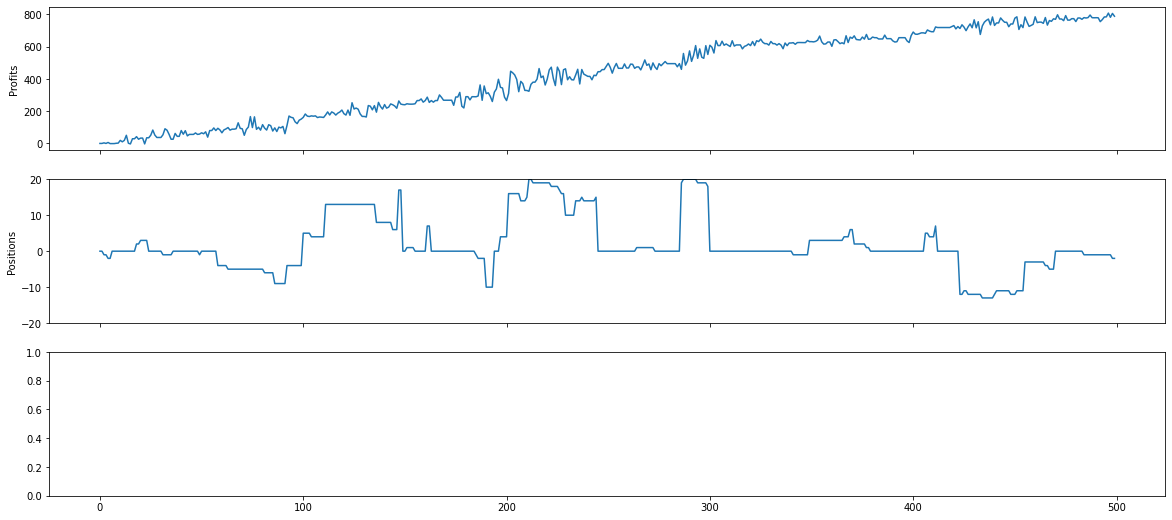

In [17]:
length = 500
position_limit = 20

x = range(length)
y = [float(num) for num in profits]
pos = [float(num) for num in positions]

fig, (ax1,ax2, ax3) = plt.subplots(3,1,figsize=(20, 9),sharex=True)

ax1.plot(x, y[:length])
ax1.set_ylabel("Profits")

ax2.plot(x, pos[:length])
ax2.set_ylabel("Positions")
ax2.set_ybound(-position_limit,position_limit)

plt.show()

### Plot From CSVs

In [70]:
file_path = "./logs/final_final.log"
product = "BANANAS"

csv_path = process_log_file(file_path)

df = pd.read_csv(csv_path, delimiter=";")
product_df = df.loc[df["product"]==product]
mid_prices = np.array(product_df["mid_price"])

finished reading ./logs/final_final.log
Error: File './logs/final_final.csv' already exists.


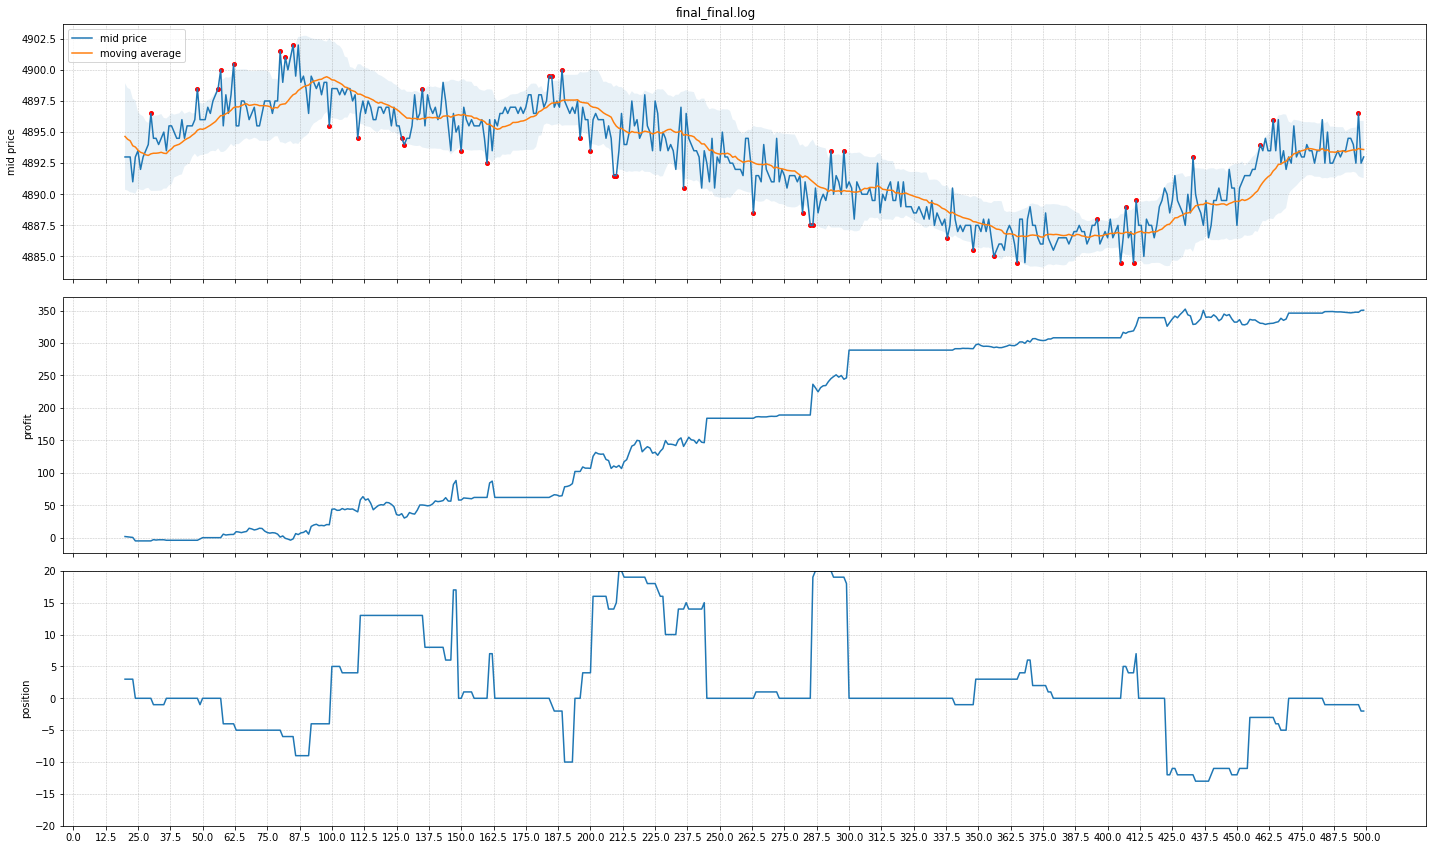

In [99]:
length = 500
window_size = 20

avg, std = blg(mid_prices[:length], window_size)
x = np.array(range(window_size,length))
y = mid_prices[window_size:length]

fig, axes = plt.subplots(3,1,figsize=(20, 12),sharex=True)
fig.suptitle(f"{file_path.split('/')[-1]}")
fig.set_tight_layout(True)

upper = avg + 2 * std
lower = avg - 2 * std
axes[0].plot(x, y, label="mid price")
axes[0].set_ylabel("mid price")
axes[0].plot(x, avg[:length], label="moving average")
axes[0].fill_between(x, upper[:length], lower[:length], alpha=0.1)
axes[0].scatter(x[y>upper],y[y>upper], marker='o',color='red', s=8000/length)
axes[0].scatter(x[y<lower],y[y<lower], marker='o',color='red', s=8000/length)

axes[0].legend(loc='upper left')

axes[1].plot(x, product_df["profit_and_loss"][window_size:length])
axes[1].set_ylabel("profit")

axes[2].plot(x, pos[window_size:length])
axes[2].set_ylabel("position")
axes[2].set_ybound(-20,20)

for ax in axes:
    ax.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
    ax.set_xticks(np.linspace(0,length,41))

plt.subplots_adjust(hspace=0)
plt.show()